In [1]:
!nvidia-smi

Fri Jun 20 13:16:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86                 Driver Version: 571.59         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A6000               On  |   00000000:3B:00.0 Off |                  Off |
| 30%   36C    P8              9W /  300W |    1408MiB /  49140MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 데이터 준비

In [ ]:
!cd data/kaggle && curl -L -o ./smoke-fire-detection-yolo.zip\
  https://www.kaggle.com/api/v1/datasets/download/sayedgamal99/smoke-fire-detection-yolo
!cd data/kaggle/ && unzip smoke-fire-detection-yolo.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2908M  100 2908M    0     0  28.7M      0  0:01:40  0:01:40 --:--:-- 28.6M


Error: Image not found at /home/jbtcore/workspaces/object-detection/yolov8/data/kaggle/data/train/images/AoF00008.jpg


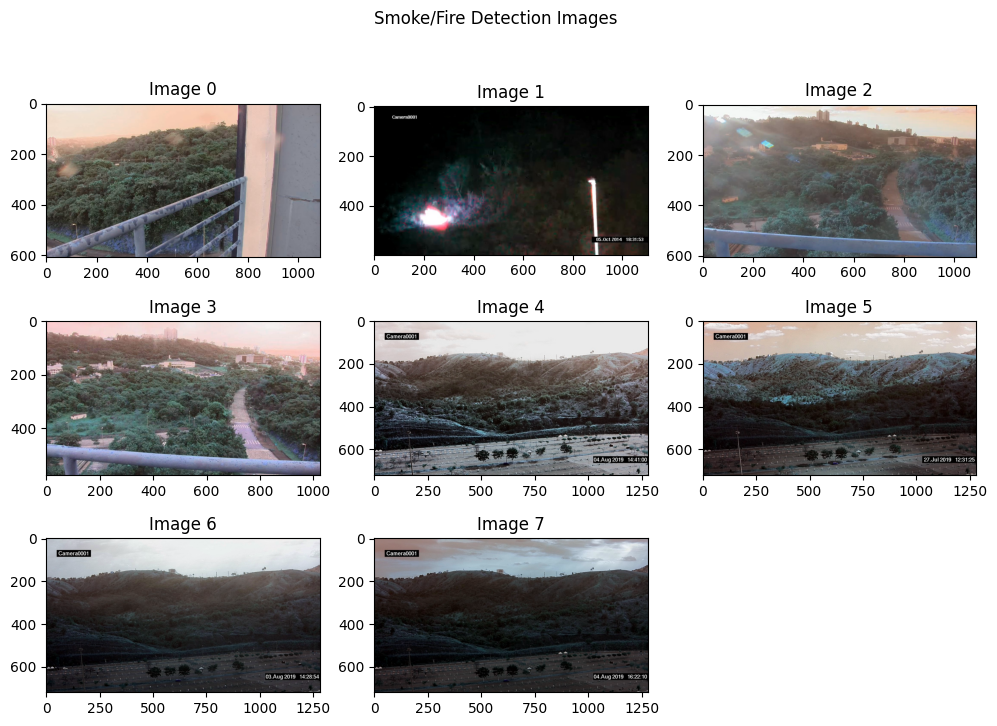

In [ ]:
import os, cv2, yaml, random, numpy as np
from glob import glob
from torchvision import transforms as T
import yaml
import os
import glob
import torch
import matplotlib.pyplot as plt

HOME = os.path.abspath('')
plt.figure(figsize=(12,8))
plt.suptitle("Smoke/Fire Detection Images")
for i in range(9):
    image_path = f'{HOME}/data/kaggle/data/train/images/AoF0000{i}.jpg'
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        continue
    image = cv2.imread(image_path)
    h, w, c = image.shape
    plt.subplot(3,3, i + 1)
    plt.title(f'Image {i}')
    plt.imshow(image)

## Install YOLOv8


In [110]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
Setup complete ✅ (64 CPUs, 125.6 GB RAM, 122.4/1006.9 GB disk)


## Custom Training

In [ ]:

print(HOME)
import os
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/data/kaggle/data.yaml epochs=25 batch=0.8 workers=0 imgsz=800 device=0 cache=True plots=True 

/home/jbtcore/workspaces/object-detection/yolov8
Ultralytics 8.3.156 🚀 Python-3.9.18 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=0.8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/jbtcore/workspaces/object-detection/yolov8/data/kaggle/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, opt

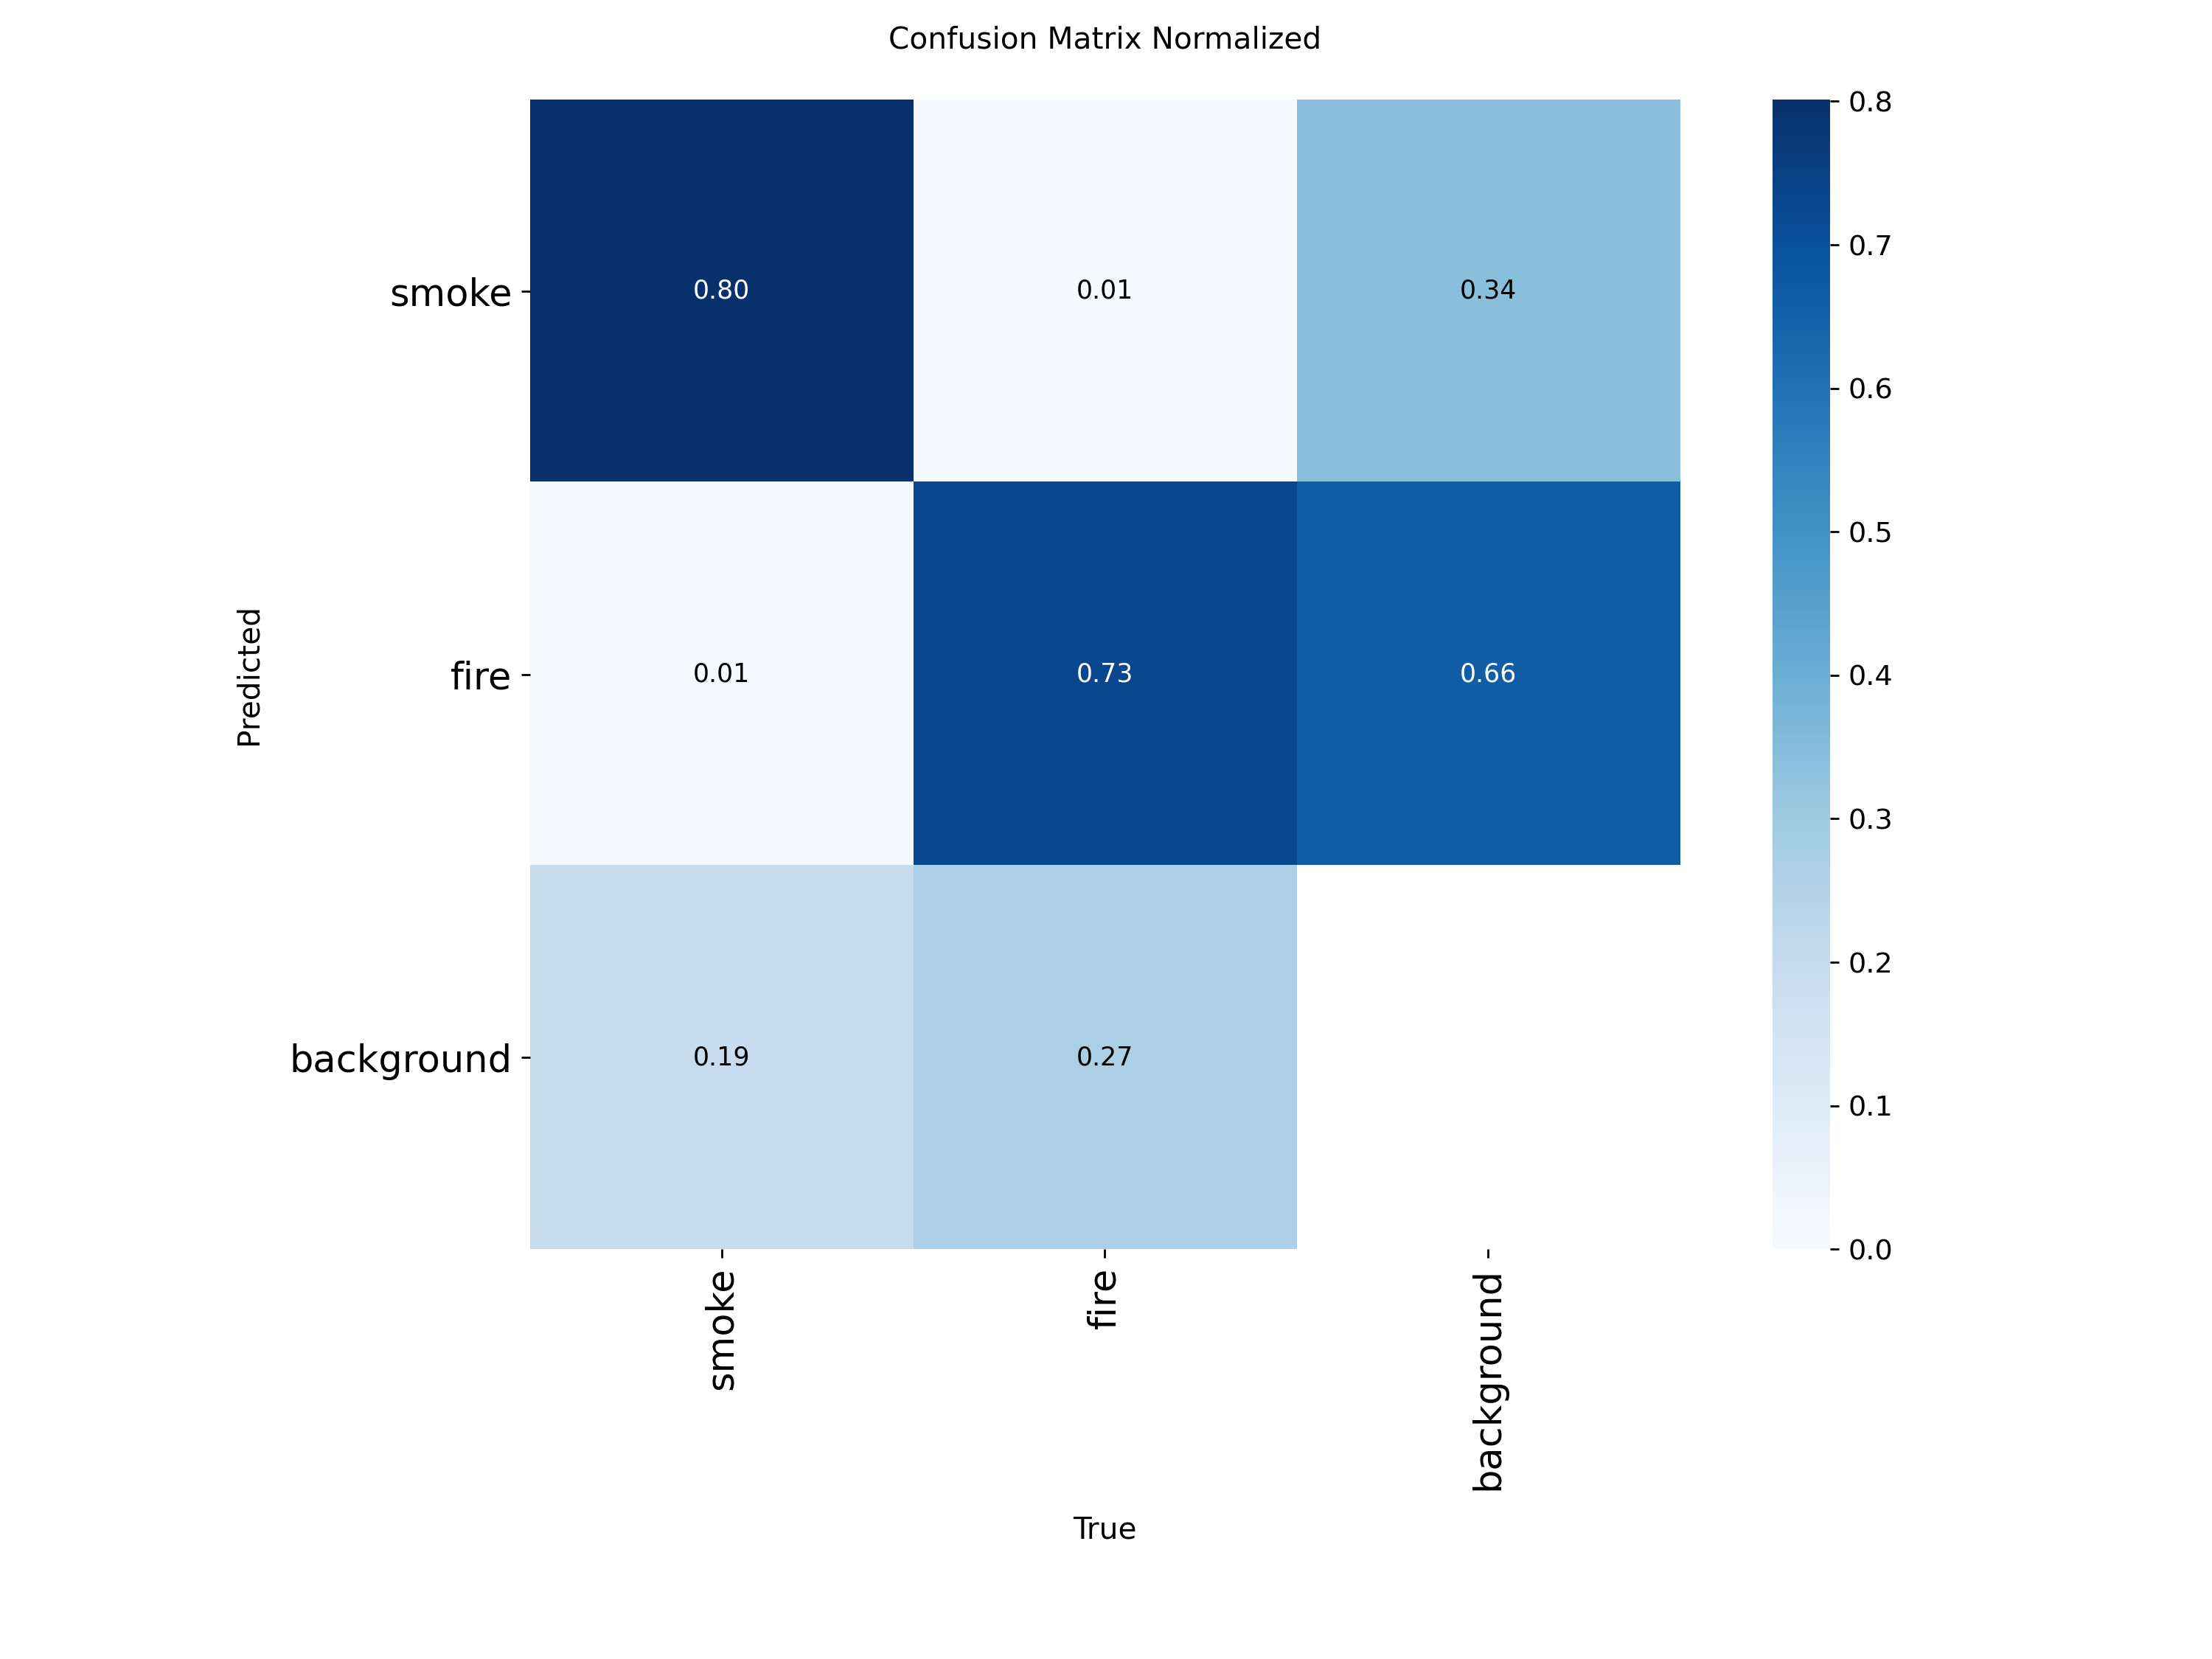

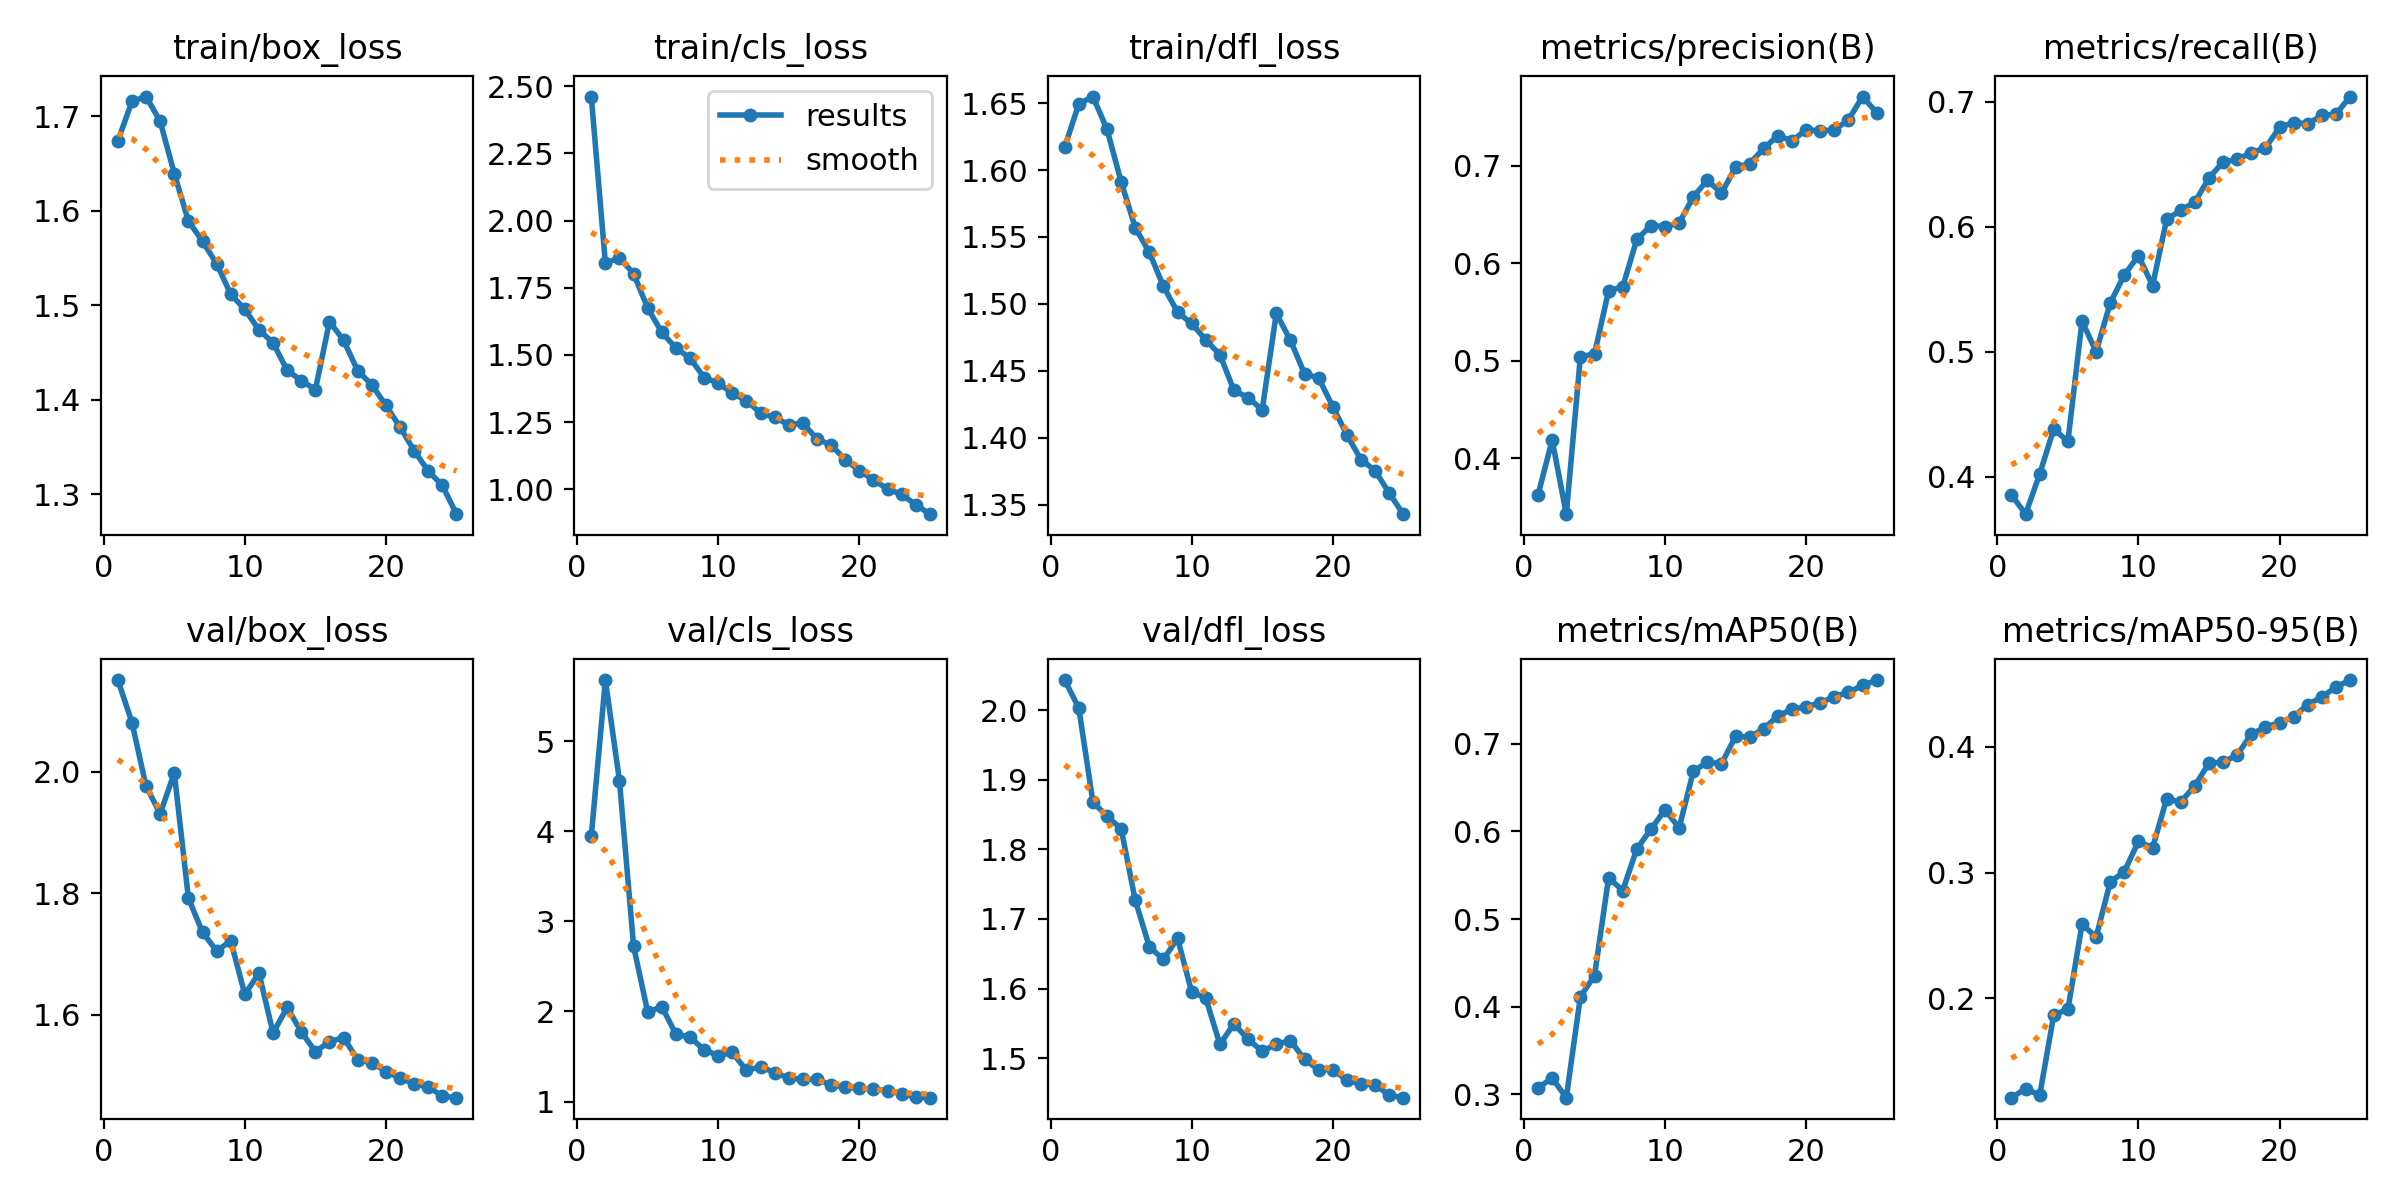

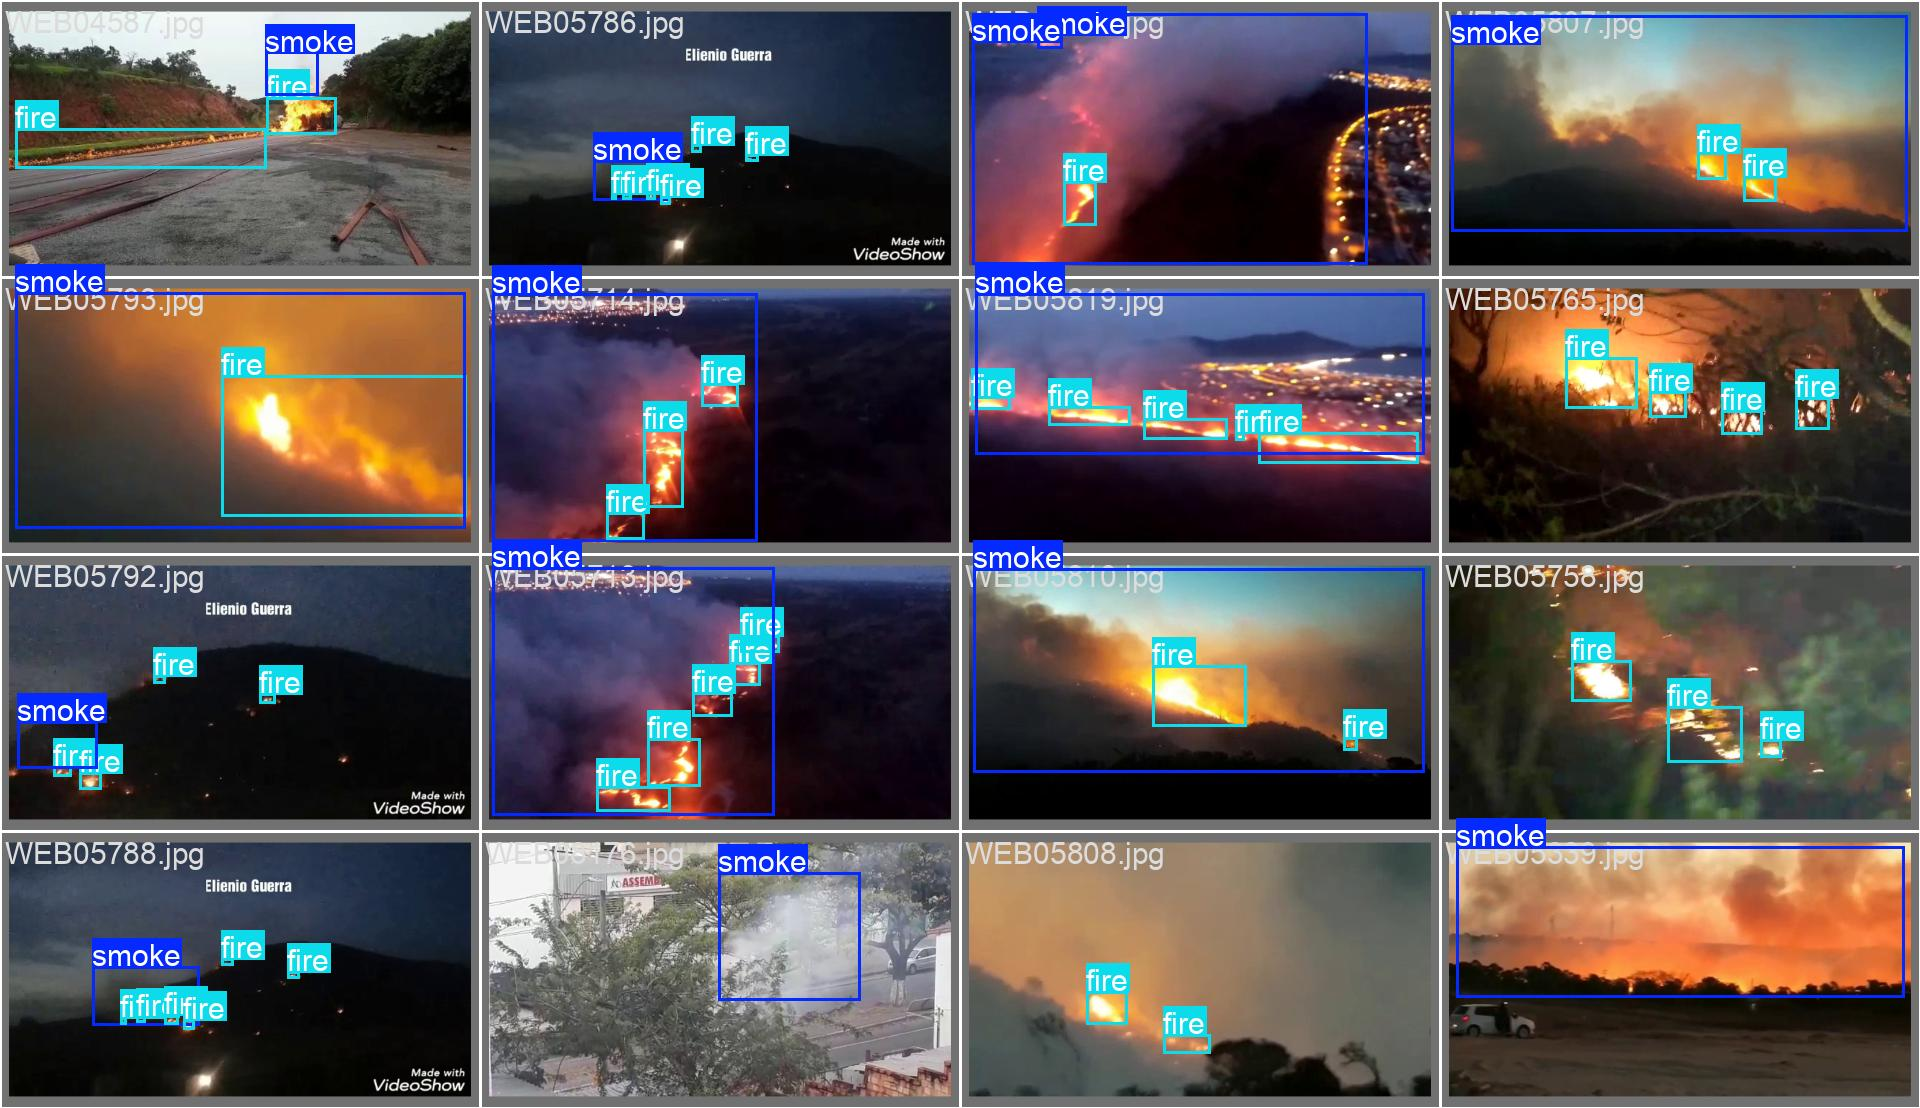

In [24]:
from PIL import Image

confustion_img = Image.open('runs/detect/train/confusion_matrix_normalized.png')
eval_img = Image.open('runs/detect/train/results.png')
res_img = Image.open('runs/detect/train/val_batch1_labels.jpg')

confustion_img.show()
eval_img.show()
res_img.show()

In [33]:
from ultralytics import YOLO 
model = YOLO('runs/detect/train/weights/best.pt')
source = 'https://youtu.be/4mKdEL8Njew'
result = model(source, stream=True, save=True)

In [6]:

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='images/wildfire.mp4'

Ultralytics 8.3.156 🚀 Python-3.9.18 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/297) /home/jbtcore/workspaces/object-detection/yolov8/images/wildfire.mp4: 480x800 1 smoke, 4 fires, 65.5ms
video 1/1 (frame 2/297) /home/jbtcore/workspaces/object-detection/yolov8/images/wildfire.mp4: 480x800 1 smoke, 4 fires, 8.4ms
video 1/1 (frame 3/297) /home/jbtcore/workspaces/object-detection/yolov8/images/wildfire.mp4: 480x800 1 smoke, 4 fires, 7.9ms
video 1/1 (frame 4/297) /home/jbtcore/workspaces/object-detection/yolov8/images/wildfire.mp4: 480x800 1 smoke, 4 fires, 9.1ms
video 1/1 (frame 5/297) /home/jbtcore/workspaces/object-detection/yolov8/images/wildfire.mp4: 480x800 1 smoke, 4 fires, 7.8ms
video 1/1 (frame 6/297) /home/jbtcore/workspaces/object-detection/yolov8/images/wildfire.mp4: 480x800 1 smoke, 4 fires, 7.7ms
video 1/1 (frame 7/297) /home/jbtcore/workspaces/object-detection/yolo